# Explore here

***Prediciendo la diabetes**
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_diabetes=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv",  usecols=lambda x: x != 'Unnamed: 0')
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data_diabetes.shape

(768, 9)

In [4]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


El conjunto de datos tiene solo variables numericas

Eliminamos duplicados

In [5]:
data_diabetes= data_diabetes.drop_duplicates()
data_diabetes= data_diabetes.reset_index(inplace = False, drop = True)
data_diabetes.shape

(768, 9)

Eliminamos variables con poca relevancia para el analisis

ANALISIS UNIVARIANTE

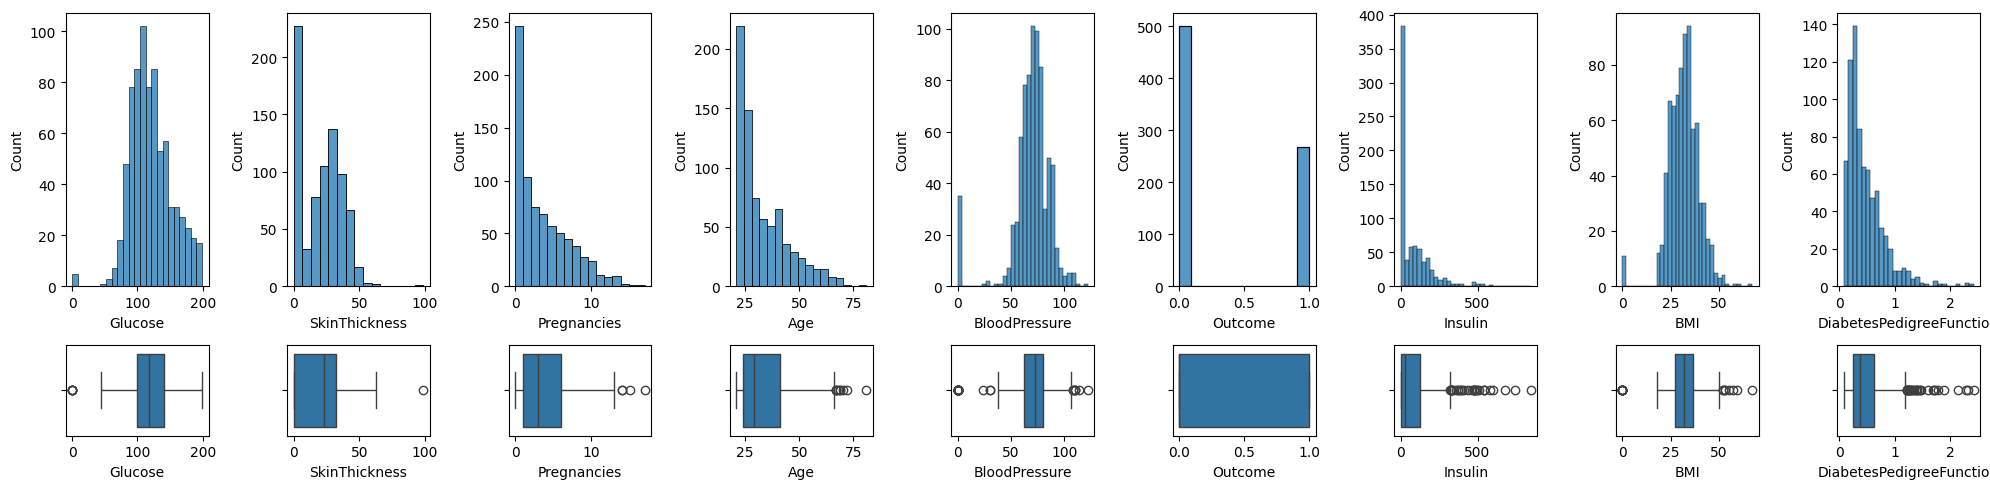

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 9, figsize=(20, 5), gridspec_kw={'height_ratios': [6, 2]})

variables = ['Glucose', 'SkinThickness','Pregnancies', 'Age','BloodPressure', 'Outcome', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

for i, var in enumerate(variables):
    sns.histplot(ax=axis[0, i], data=data_diabetes, x=var)
    sns.boxplot(ax=axis[1, i], data=data_diabetes, x=var)

plt.tight_layout()
plt.show()


Eliminanos los outliers, valores extremos que puedan afectar a nuestro análisis

In [7]:
import pandas as pd

# Función para ajustar outliers con clip usando IQR
def clip_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Primer cuartil
        Q3 = df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1                # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Ajustar los valores extremos
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Aplicar la función a las columnas numéricas
numeric_columns = ['Age', 'SkinThickness','Glucose', 'Pregnancies','BloodPressure', 'Outcome', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
data_clean = clip_outliers_iqr(data_diabetes, numeric_columns)

print(f"Datos originales: {len(data_diabetes)} filas")
print(f"Datos después de clip: {len(data_clean)} filas")


Datos originales: 768 filas
Datos después de clip: 768 filas


In [8]:
data_clean.to_csv('dataset_procesado.csv', index=False)


Esta visualizacion solo es para ver que se han eliminado los outliers

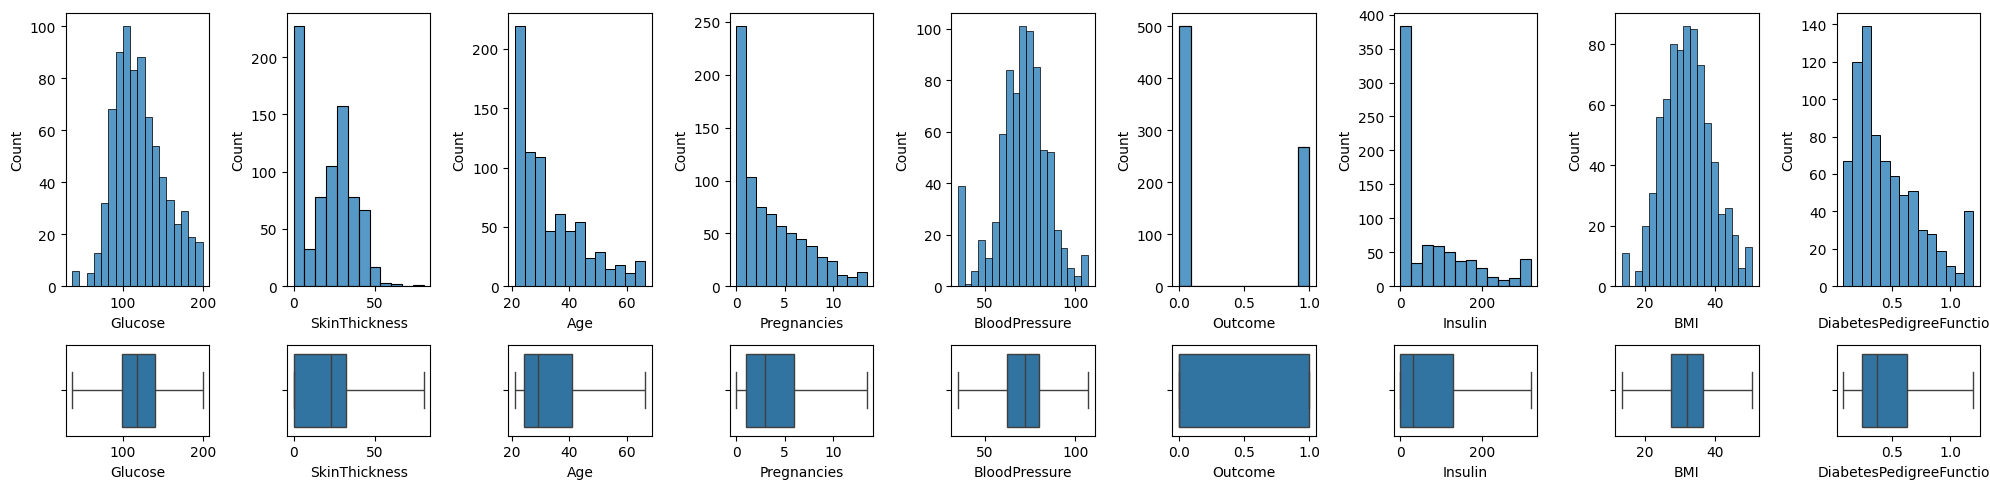

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 9, figsize=(20, 5), gridspec_kw={'height_ratios': [6, 2]})

variables = ['Glucose','SkinThickness','Age', 'Pregnancies','BloodPressure', 'Outcome', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

for i, var in enumerate(variables):
    sns.histplot(ax=axis[0, i], data=data_clean, x=var)
    sns.boxplot(ax=axis[1, i], data=data_clean, x=var)

plt.tight_layout()
plt.show()

Dividimos nuestro conjunto de datos para poder modelar

In [187]:
from sklearn.model_selection import train_test_split
#
X=data_clean.drop('Outcome', axis=1)
y=data_clean['Outcome']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)


In [188]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.0,84.0,35,0,0.000,13.35,0.304,21.0
618,9.0,112.0,82,24,0.000,28.20,1.200,50.0
346,1.0,139.0,46,19,83.000,28.70,0.654,22.0
294,0.0,161.0,50,0,0.000,21.90,0.254,65.0
231,6.0,134.0,80,37,318.125,46.20,0.238,46.0


In [189]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [190]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7077922077922078

Haremos una busqueda de Parametros con GridSearchCV

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el grid de parámetros a probar
param_grid = {
    'criterion': ['gini', 'entropy'],          # Función de medida de impureza
    'max_depth': [5, 10, 15, 20],          # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],             # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1]                # Número mínimo de muestras en una hoja
}


# Configurar GridSearchCV
grid_search= GridSearchCV(model, param_grid, scoring="accuracy", cv=5 )
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn=warn


# Ajustar GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor puntaje obtenido
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje (CV):", grid_search.best_score_)

# Utilizar el mejor estimador para hacer predicciones
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Mejores parámetros: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor puntaje (CV): 0.7670798347327735


In [200]:

def warn(*args,**kwargs):
    pass
import warnings
warnings.warn=warn


# Ajustar GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor puntaje obtenido
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje (CV):", grid_search.best_score_)

# Utilizar el mejor estimador para hacer predicciones
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Mejores parámetros: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor puntaje (CV): 0.7670798347327735


In [193]:
# importamos arbol de decisión
from sklearn.tree import DecisionTreeClassifier


model_ajustado = DecisionTreeClassifier(ccp_alpha= 0.01, criterion= 'gini', max_depth= 5, min_samples_leaf= 4, min_samples_split= 2, random_state = 42)
model_ajustado.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred_ajustado = model_ajustado.predict(X_test)

# Calcular la exactitud del modelo
base_accuracy_ajustado = accuracy_score(y_test, y_pred_ajustado)
base_accuracy_ajustado

0.7077922077922078

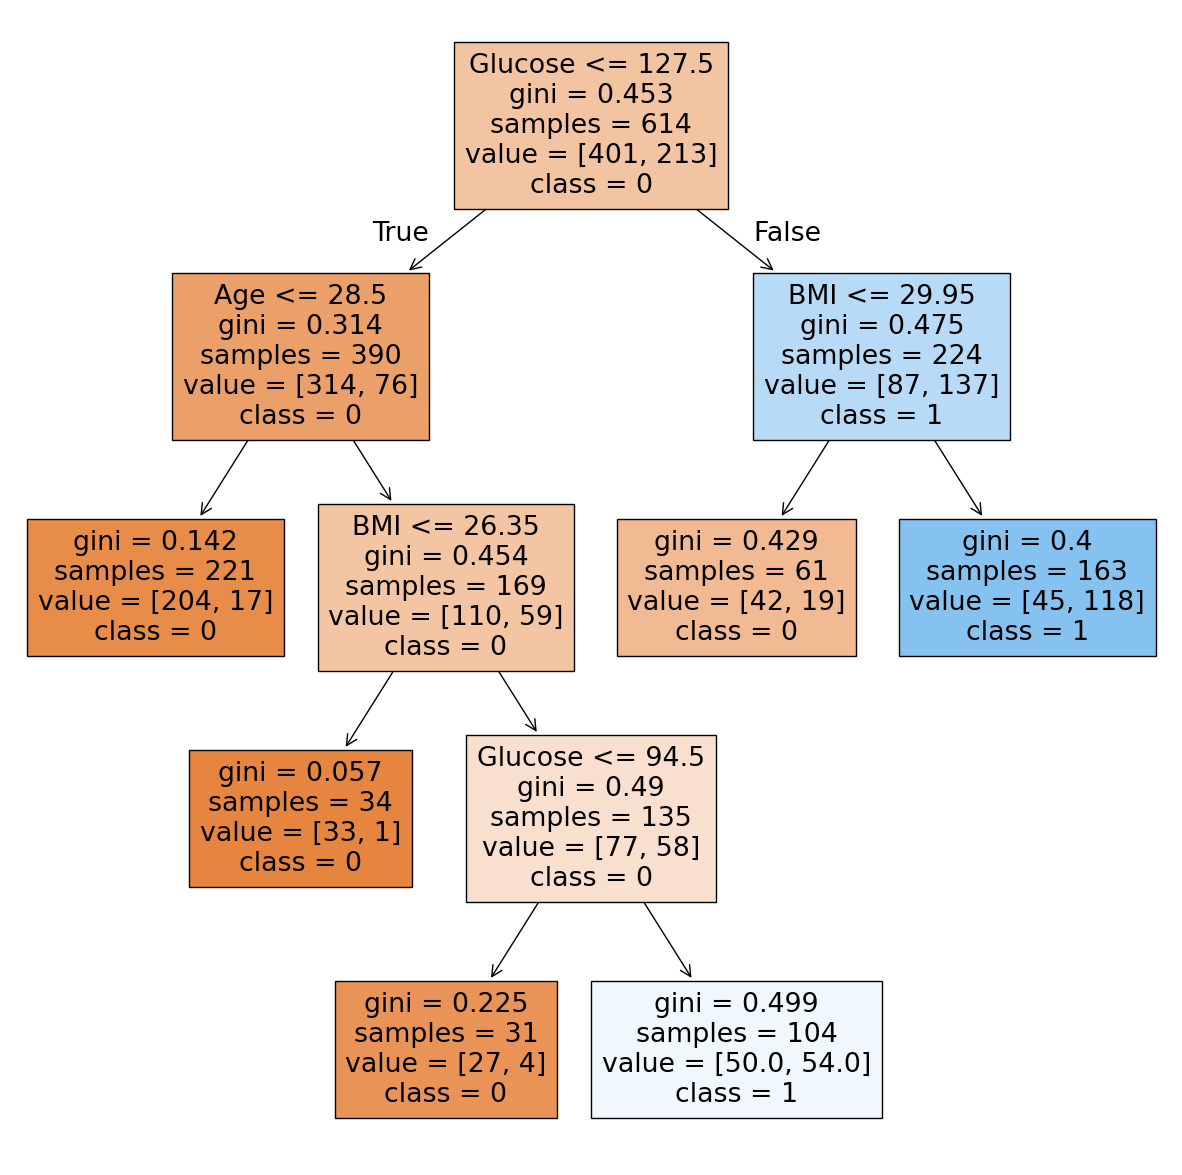

In [194]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_ajustado, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [195]:
# revisión sobreajuste Arbol de decisión
y_train_AD = model_ajustado.predict(X_train)
base_accuracy_AD_train = accuracy_score(y_train, y_train_AD)
base_accuracy_AD_train

0.7785016286644951

Revisamos que tan acertado es nuestro modelo

In [196]:
from sklearn.metrics import accuracy_score

# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = model_ajustado.predict(X_train)
y_test_pred = model_ajustado.predict(X_test)

# Calcular la accuracy en ambos conjuntos
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Evaluación simple: si la accuracy de entrenamiento es mucho mayor que la de prueba, podría haber sobreajuste.
if train_accuracy - test_accuracy > 0.1:
    print("Posible sobreajuste detectado: el rendimiento en entrenamiento es significativamente mayor que en prueba.")
else:
    print("No se evidencia un sobreajuste significativo.")


Training Accuracy: 0.779
Test Accuracy: 0.708
No se evidencia un sobreajuste significativo.


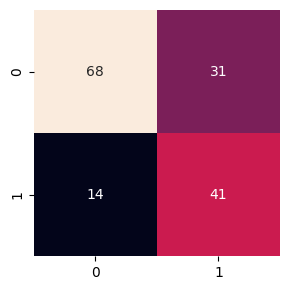

In [197]:
from sklearn.metrics import confusion_matrix
diabetes_cm=confusion_matrix(y_test, y_pred_ajustado)
cm_df=pd.DataFrame(diabetes_cm)
plt.figure(figsize=(3,3))
sns.heatmap(cm_df, annot=True, fmt='d', cbar=False)
plt.tight_layout()
plt.show()

Hay  68 verdaderos positivos, 41 verdaderos negativos, 14 falsos positivos, 31, falsos negativos

In [198]:
from sklearn.metrics import classification_report, confusion_matrix

# Suponiendo que tienes tus etiquetas reales y predicciones
print(confusion_matrix(y_test, y_pred_ajustado))
print(classification_report(y_test, y_pred_ajustado))


[[68 31]
 [14 41]]
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        99
           1       0.57      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.71       154



EL modelo predice mejor, a las personas que no tienen diabetes, que las que si tienen

GUARDAMOS EL MODELO

In [ ]:
from pickle import dump

dump(model_ajustado, open("../models/decision_tree_classifier_default_42.sav", "wb"))



Bad pipe message: %s [b'0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7\r\nHost: localhost:44203\r\nUs', b'-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.']
Bad pipe message: %s [b'0.0 Safari/537.36 OPR/117.0.0.0\r\nAccept-Encodin']
Bad pipe message: %s [b' gzip, deflate, br, zstd\r\nAccept-Language: es-ES,es;q=0.9\r\nCache-Control: max-age=0\r\nReferer: https://']
Bad pipe message: %s [b'thub.com/\r\nX-Request-ID: 48bf74940cd0fb42a00f7e128a031f38\r\nX-Real-IP: 10.240.0.69\r\nX-Forwarded-Port: 4', b'\r\nX-Forwarded-Scheme: https\r\nX-Original-URI: /\r\nX-S', b'eme: https\r\nsec-fetch-site: cross-site\r\nsec-fetch-mode: navigate\r\nsec-fetch-dest: document\r\nsec-ch']
Bad pipe message: %s [b'a: "Not A(Brand";v="8", "Chromium";v="132", ', b'pera";v="117"\r\nsec-ch-ua-mobile: ', b'\r\nsec-ch-ua-platform: "Windows"\r\npriority: u=0, i\r\nX-Original-']
Bad pipe message: %s [b'oto: https\r\nX-Forwarded

**CONCLUSION**
Hemos logrado ajustar el modelo, y evitar un sobreajuste, con los datos que se tienen el modelo no logra predecir tan acertadamente a las personas que tienen diabetes., tiene una precision del 77% en entrenamiento y 70% en testeo

Se ha creado un servicio gratuito en Render para poder desplegar la aplicación web en línea

https://arbol-decision-2.onrender.com